# 🎮 Experiment 2: Linear Regression on Video Game Sales

Date: *29/01/2026*


---



## Aim
To implement Linear Regression to predict Global Sales of video games using regional sales data.


## Theory
Linear Regression is a supervised machine learning algorithm used to predict continuous values.

It finds a linear relationship between independent variables and a dependent variable.

Here, Global Sales are predicted using regional sales.


## Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Upload Dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("vgsales.csv")


Saving vgsales.csv to vgsales (1).csv


## Display Data


In [ ]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Dataset Info


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Checking Missing Values


In [ ]:
df.isnull().sum()


,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## Handling Missing Values using Imputer


In [ ]:
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include=np.number)

imputer = SimpleImputer(strategy="mean")

df[num_cols.columns] = imputer.fit_transform(num_cols)


## Selecting Features


In [ ]:
X = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
y = df['Global_Sales']


## Splitting Dataset


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


## Training Linear Regression Model


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Prediction


In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]


array([0.15035549, 0.4103247 , 0.02038608, 0.02038588, 0.36032236])

## Visualization


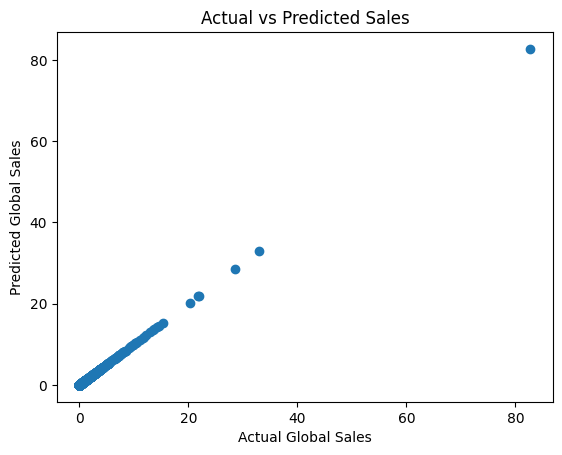

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


## Model Evaluation


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)


0.9999916069387951

## Result
Linear Regression model was successfully trained and used to predict global video game sales.


## Conclusion
Linear Regression can effectively predict global sales using regional sales data.
